# SVR Model

Destek Vektör regresyonu, doğrusal ve doğrusal olmayan regresyonu destekleyen bir tür Destek vektör modelidir.

##### Numpy ve Pandas modülleri eklenir

In [1]:
import numpy as np
import pandas as pd

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

##### Dataset almak için modüller import edilir ardıdan istenilen veri seçilir

In [3]:
import datetime
from pandas_datareader import DataReader

In [4]:
apple=DataReader("AAPL","yahoo",start=datetime.datetime(2020,1,1),end=datetime.datetime(2020,4,24))
df=apple.copy()

##### Verinin istenilen bölümleri ayrılır

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,299.638885
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,296.725769
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.090149
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,297.683533
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,302.472137


In [6]:
df=df.iloc[:,:4]

In [7]:
df.head()

,High,Low,Open,Close
Date,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006
2020-01-03,300.579987,296.500000,297.149994,297.429993
2020-01-06,299.959991,292.750000,293.790009,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002


In [8]:
df.index=pd.DatetimeIndex(df.index)

##### X değişkeni ve Y değişkeni seçilir

In [9]:
X=df[["High","Low","Open"]]
Y=df[["Close"]]

##### Değişkenler eğitim seti ve test seti olarak ayrılır(Eğitim : %75 , Test : %25)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

##### Model oluşturulmadan önce standart dönüşümü yapılır

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler_train_x=StandardScaler()
scaler_test_x=StandardScaler()
scaler_train_y=StandardScaler()
scaler_test_y=StandardScaler()

In [14]:
X_train_scaler=scaler_train_x.fit_transform(X_train)
X_test_scaler=scaler_test_x.fit_transform(X_test)

In [15]:
Y_train_scaler=scaler_train_y.fit_transform(Y_train)
Y_test_scaler=scaler_test_y.fit_transform(Y_test)

##### SVR modülü import edilir ve ardından model oluşturulur

In [16]:
from sklearn.svm import SVR

In [17]:
svr_model=SVR().fit(X_train_scaler,Y_train_scaler)

##### Değişkenler arasındaki farkı görmek için tablo oluşturulur

In [18]:
data=pd.DataFrame(X_test_scaler,index=X_test.index,columns=X_test.columns)

In [19]:
data.head()

,High,Low,Open
Date,,,
2020-03-13,-0.340563,-0.877033,-0.613169
2020-02-11,1.324397,1.368258,1.461712
2020-02-14,1.403141,1.509614,1.502000
2020-04-02,-1.656860,-1.425040,-1.480796
2020-03-09,-0.409843,-0.533888,-0.653459


In [20]:
data=pd.concat([data,pd.DataFrame(Y_test_scaler,index=X_test.index)],join="inner",axis=1)

In [21]:
data.head()

,High,Low,Open,0
Date,,,,
2020-03-13,-0.340563,-0.877033,-0.613169,-0.234709
2020-02-11,1.324397,1.368258,1.461712,1.225189
2020-02-14,1.403141,1.509614,1.502000,1.412410
2020-04-02,-1.656860,-1.425040,-1.480796,-1.393092
2020-03-09,-0.409843,-0.533888,-0.653459,-0.648417


In [22]:
data=data.rename(columns={0:"Close"})

In [23]:
data["Close_1"]=svr_model.predict(X_test_scaler)

##### Gerçek Close değeri ile tahmin edilen Close değeri görsel olarak incelenir

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

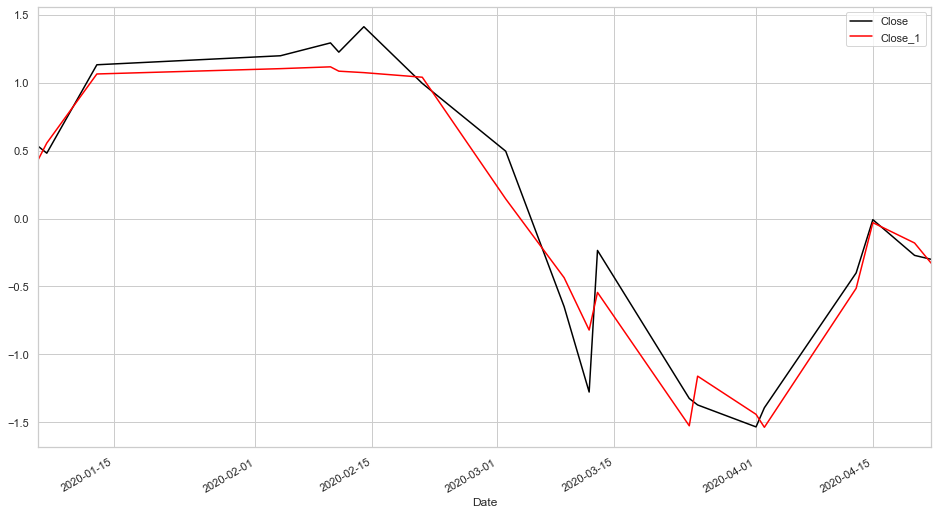

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,9))
data["Close"].plot(color="black")
data["Close_1"].plot(color="red")
plt.legend()

##### Daha iyi bir parametre bulmak için GridSearchCV kullanılır

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
model=SVR()

In [28]:
params={"C":np.arange(0.1,50.1,0.1)}

In [29]:
svr_model=GridSearchCV(model,params,cv=10)

In [30]:
svr_model.fit(X_train_scaler,Y_train_scaler)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,...
       44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1,
       45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2,
       46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2, 47.3,
       47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2, 48.3, 48.4,
       48.5, 48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3, 49.4, 49.5,
       49.6, 49.7, 49.8, 49.9, 50. ])},
             pre_dispatch='2*n_jobs', re

##### En iyi C parametresi bulunur

In [31]:
svr_model.best_params_

{'C': 7.0}

In [32]:
svr_model=SVR(C=6.9).fit(X_train_scaler,Y_train_scaler)

In [33]:
data["Close_2"]=svr_model.predict(X_test_scaler)

##### Gerçek Close değeri, ilk Close tahmin değeri ve iki Close tahmin değeri görsel olarak incelenir

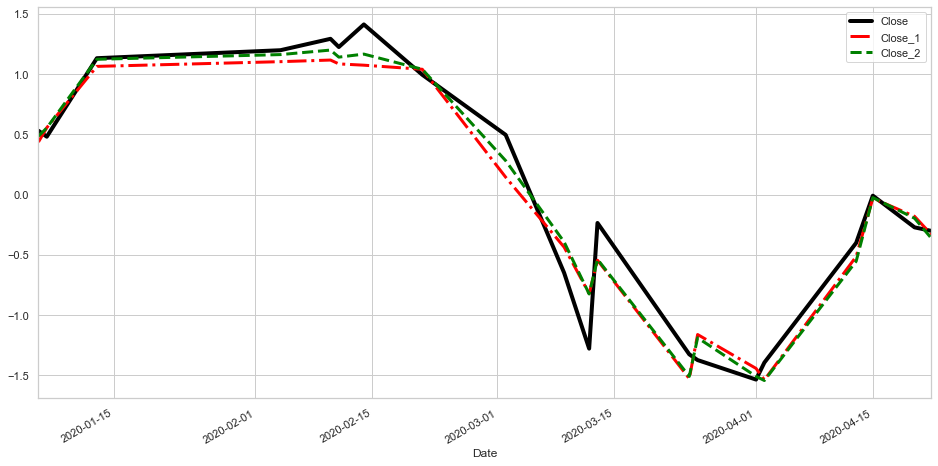

In [34]:
plt.figure(figsize=(16,8))
data["Close"].plot(color="black",lw=4)
data["Close_1"].plot(color="red",lw=3,style="-.")
data["Close_2"].plot(color="green",lw=3,style="--")
plt.legend()